In [1]:

import matplotlib.pyplot as plt
import numpy as np
from qutip import fidelity

%cd ".."
%cd ".."
print("The lines above should navigate you to the rb_photon_prod path")

from modules.simulation import Simulation
from modules.differential_light_shifts import DifferentialStarkShifts
from modules.laser_pulses import *

from scipy import optimize, interpolate

/Users/ernst/Desktop/rb_photon_prod_dev/src
/Users/ernst/Desktop/rb_photon_prod_dev
The lines above should navigate you to the rb_photon_prod path


In [2]:
#List the groundstates to be included in the simulation

_ground_states = {
    "g1M":0, "g1":1, "g1P":2, # F=1,mF=-1,0,+1 respectively
    "g2MM":3, "g2M":4, "g2":5, "g2P":6, "g2PP":7 # F=2,mF=-2,..,+2 respectively
}
"""
_ground_states = {"g1M":0, "g2":1}
"""

# List the excited levels to include in the simulation. the _d1 levels correspond to the D1 line levels, the other levels are by default the d2 levels

_x_states = [
#'x0',
#'x1M','x1','x1P',
#'x2MM','x2M','x2','x2P','x2PP',
#'x3MMM', 'x3MM','x3M','x3','x3P','x3PP', 'x3PPP',
'x1M_d1','x1_d1','x1P_d1',
'x2MM_d1','x2M_d1','x2_d1','x2P_d1','x2PP_d1'
]
"""
_x_states = ["x1M_d1"]
"""

'\n_x_states = ["x1M_d1"]\n'

In [3]:
rb_atom_sim = Simulation(cavity=False, bfieldsplit="0p07",ground_states=_ground_states, x_states=_x_states)

In [4]:
# use scipy to try to optimise the results for 4 different combinations
#initial and final desired states, can get density matrix from psi*psi.dag()

#first rotation
psi_init_1   = rb_atom_sim.kb_class.get_ket_atomic("g2")
psi_des_1    = 1/(np.sqrt(2))*(rb_atom_sim.kb_class.get_ket_atomic("g2") - rb_atom_sim.kb_class.get_ket_atomic("g1M"))
state_i_1    = "g2"
F_i_1        = 2
state_f_1    = "g1M"
F_f_1        = 1
state_x_1    = "x1M_d1"
F_x_1        = 1
delta_p_1    = rb_atom_sim.get_splitting("deltaZx1M_d1")
delta_s_1    = (rb_atom_sim.get_splitting("deltaZx1M_d1")-rb_atom_sim.get_splitting("deltaZ"))
cg_pump_1    = "CG_d1g2x1M"
cg_stokes_1  = "CG_d1g1Mx1M"
pump_pol_1   = 'sigmaM'
stokes_pol_1 = 'pi'

rotation_dict_1 = {"psi_init":psi_init_1, "psi_des":psi_des_1, "state_i":state_i_1, "state_f":state_f_1,\
                   "state_x":state_x_1, "delta_p":delta_p_1, "delta_s":delta_s_1, "cg_pump":cg_pump_1,\
                    "cg_stokes":cg_stokes_1, "pump_pol":pump_pol_1, "stokes_pol":stokes_pol_1,
                    "F_x":F_x_1, "F_i":F_i_1, "F_f":F_f_1}

#second rotation
psi_init_2   = 1/(np.sqrt(2))*(rb_atom_sim.kb_class.get_ket_atomic('g2')-rb_atom_sim.kb_class.get_ket_atomic('g2MM'))
psi_des_2    = 1/(np.sqrt(2))*(rb_atom_sim.kb_class.get_ket_atomic('g1P')-rb_atom_sim.kb_class.get_ket_atomic('g2MM'))
state_i_2    = "g2"
F_i_2        = 2
state_f_2    = "g1P"
F_f_2        = 1
state_x_2    = "x1_d1"
F_x_2        = 1
delta_p_2    = 0
delta_s_2    = rb_atom_sim.get_splitting("deltaZ")
cg_pump_2    = "CG_d1g2x1"
cg_stokes_2  = "CG_d1g1Px1"
pump_pol_2   = "pi"
stokes_pol_2 = "sigmaM"


rotation_dict_2 = {"psi_init":psi_init_2, "psi_des":psi_des_2, "state_i":state_i_2, "state_f":state_f_2,\
                   "state_x":state_x_2, "delta_p":delta_p_2, "delta_s":delta_s_2, "cg_pump":cg_pump_2,\
                    "cg_stokes":cg_stokes_2, "pump_pol":pump_pol_2, "stokes_pol":stokes_pol_2,
                    "F_x":F_x_2, "F_i":F_i_2, "F_f":F_f_2}

#third rotation
psi_init_3   = 1/(np.sqrt(2))*(rb_atom_sim.kb_class.get_ket_atomic('g2PP')-rb_atom_sim.kb_class.get_ket_atomic('g2MM'))
psi_des_3    = 1/(np.sqrt(2))*(rb_atom_sim.kb_class.get_ket_atomic('g2PP')-rb_atom_sim.kb_class.get_ket_atomic('g1M'))
state_i_3    = "g2MM"
F_i_3        = 2
state_f_3    = "g1M"
F_f_3        = 1
state_x_3    = "x1M_d1"
F_x_3        = 1
delta_p_3    = (rb_atom_sim.get_splitting("deltaZx1M_d1")+2*rb_atom_sim.get_splitting("deltaZ"))
delta_s_3    = (-rb_atom_sim.get_splitting("deltaZ")+rb_atom_sim.get_splitting("deltaZx1M_d1"))
cg_pump_3    = "CG_d1g2MMx1M"
cg_stokes_3  = "CG_d1g1Mx1M"
pump_pol_3   = "sigmaP"
stokes_pol_3 = "pi"


rotation_dict_3 = {"psi_init":psi_init_3, "psi_des":psi_des_3, "state_i":state_i_3, "state_f":state_f_3,\
                   "state_x":state_x_3, "delta_p":delta_p_3, "delta_s":delta_s_3, "cg_pump":cg_pump_3,\
                    "cg_stokes":cg_stokes_3, "pump_pol":pump_pol_3, "stokes_pol":stokes_pol_3,
                    "F_x":F_x_3, "F_i":F_i_3, "F_f":F_f_3}



#fourth rotation
psi_init_4   = 1/(np.sqrt(2))*(rb_atom_sim.kb_class.get_ket_atomic('g2PP')-rb_atom_sim.kb_class.get_ket_atomic('g2MM'))
psi_des_4    = 1/(np.sqrt(2))*(rb_atom_sim.kb_class.get_ket_atomic('g1P')-rb_atom_sim.kb_class.get_ket_atomic('g2MM'))
state_i_4    = "g2PP"
F_i_4        = 2
state_f_4    = "g1P"
F_f_4        = 1
state_x_4    = "x1P_d1"
F_x_4        = 1
delta_p_4    = (rb_atom_sim.get_splitting("deltaZx1P_d1")-2*rb_atom_sim.get_splitting("deltaZ"))
delta_s_4    = (+rb_atom_sim.get_splitting("deltaZ")+rb_atom_sim.get_splitting("deltaZx1P_d1"))
cg_pump_4    = "CG_d1g2PPx1P"
cg_stokes_4  = "CG_d1g1Px1P"
pump_pol_4   = "sigmaM"
stokes_pol_4 = "pi"


rotation_dict_4 = {"psi_init":psi_init_4, "psi_des":psi_des_4, "state_i":state_i_4, "state_f":state_f_4,\
                   "state_x":state_x_4, "delta_p":delta_p_4, "delta_s":delta_s_4, "cg_pump":cg_pump_4,\
                    "cg_stokes":cg_stokes_4, "pump_pol":pump_pol_4, "stokes_pol":stokes_pol_4,
                    "F_x":F_x_4, "F_i":F_i_4, "F_f":F_f_4}



In [5]:
#####                       CHOOSE WHICH ROTATION TO OPTIMISE                      ####
params_dict = rotation_dict_2
pulse_shape = "masked"

#defining parameters that will be the same for all runs
a=1/np.sqrt(2)
b = 1/(2*np.pi)
cg_pump = rb_atom_sim.get_CG(params_dict["cg_pump"])
cg_stokes = rb_atom_sim.get_CG(params_dict["cg_stokes"])
rho_des = params_dict["psi_des"]*(params_dict["psi_des"].dag())

#scipy will seek to minimize this function
def objective_function(opt, full_info=False):
    #convert optimisation parameters to variables
    pulse_param = opt[0]
    laser_amp = opt[1]
    const_det = opt[2]
    #length_repump = 0.2
    length_repump = 0.15
    detuning_magn = 1
    #detuning_magn = opt[4]
    _n = 1
    #_n = "N/A"
    #_n = np.round(opt[4])

    t = np.linspace(0,length_repump,10000)
    t_diff = np.linspace(0, length_repump)
    stokes_amp = laser_amp/cg_stokes
    pump_amp = laser_amp/cg_pump
    _c = length_repump/3

    if pulse_shape == "fstirap":
        pump_pulse, stokes_pulse = create_fstirap(t, pulse_param, pump_amp, stokes_amp)
        pump_pulse_diff, stokes_pulse_diff = create_fstirap(t_diff, pulse_param, pump_amp, stokes_amp)
    elif pulse_shape == "masked":
        pump_pulse, stokes_pulse = create_masked(t, pump_amp, stokes_amp, pulse_param, n=_n, c=_c)
        pump_pulse_diff, stokes_pulse_diff = create_masked(t_diff, pump_amp, stokes_amp, pulse_param, n=_n, c=_c)
    else:
        raise Exception("Invalid pulse shape")

    
    #calculate shifts from the stokes and pump laser pulses
    diff_shift=DifferentialStarkShifts('d1', rb_atom_sim.rb_atom, rb_atom_sim.atom_states)
    shift_dict_stokes=diff_shift.calculate_td_detuning(params_dict["F_f"],b*stokes_pulse_diff,const_det,params_dict["stokes_pol"])
    shift_dict_pump=diff_shift.calculate_td_detuning(params_dict["F_i"],b*pump_pulse_diff,const_det,params_dict["pump_pol"])
    init_shift=diff_shift.find_state_evolution(b*pump_pulse_diff,shift_dict_pump,params_dict["state_i"])
    x_shift_p = diff_shift.find_state_evolution(b*pump_pulse_diff, shift_dict_pump, params_dict["state_x"])
    fin_shift = diff_shift.find_state_evolution(b*stokes_pulse_diff,shift_dict_stokes, params_dict["state_f"])
    x_shift_s = diff_shift.find_state_evolution(b*stokes_pulse_diff,shift_dict_stokes, params_dict["state_x"])
    x_shift_tot = x_shift_p + x_shift_s

    #calculate time varying detuning from the shifts of the levels
    pump_det_spline = interpolate.CubicSpline(t_diff, (x_shift_tot-init_shift)*detuning_magn*2*np.pi)
    stokes_det_spline = interpolate.CubicSpline(t_diff, (x_shift_tot-fin_shift)*detuning_magn*2*np.pi)

    _pump_det = pump_det_spline(t)
    _stokes_det = stokes_det_spline(t)

    d=params_dict
    #run the simulation to find the final state density matrix
    rho_fin = rb_atom_sim.run_repreparation(const_det, t, d["delta_p"],
                          d["delta_s"],d["pump_pol"],d["stokes_pol"],
                          pump_pulse, stokes_pulse, d["psi_init"], d["F_i"], d["F_x"], d["F_f"], d["F_x"],
                          pump_det=_pump_det, stokes_det=_stokes_det,
                          raman_pulses=True)
    
    score = fidelity(rho_des, rho_fin)

    print("Fidelity: ", score)

    other_info = {
        "duration": length_repump,
        "det_magn": detuning_magn,
        "pulse_n": _n,
        "pulse_c": _c,
        "pump_pulse": pump_pulse,
        "stokes_pulse": stokes_pulse,
        "pump_detuning": _pump_det,
        "stokes_detuning": _stokes_det,
        "rho_fin": rho_fin,
        "time_array": t,
        "pulse_shape": pulse_shape
    }

    if full_info:
        return (1-score, other_info)
    else:
        #has to be miminised
        return 1-score



In [6]:
print(cg_pump)
print(cg_stokes)

0.5773502682469887
0.2886916300608475


In [7]:
strategies = [
    "best1bin", # standard recommended strategy
    "best1exp", # used to get previous good results
    "rand1bin", # v slow to converge, result wasn't great
    "rand1exp", # also v slow
    "rand2bin",
    "rand2exp",
    "randtobest1bin",
    "randtobest1exp",
    "currenttobest1bin",
    "currenttobest1exp",
    "best2exp",
    "best2bin"
]

In [8]:
#parameters to vary and their bounds
pulse_param_bnd = (4,15)
amp_bnd = (100,1000)
det_bnd = (-15,0)
#durat_bnd = (0.15,0.5)
#magn_bnd = (0.8,1.2)
#n_bnd = (2, 5)


result = optimize.differential_evolution(objective_function, (pulse_param_bnd,amp_bnd,det_bnd),\
                                         strategy=strategies[1], maxiter=25, popsize=12, disp=True,\
                                         polish=False,
                                        #updating="deferred",
                                        #workers=-1,
                                         init="sobol")


Fidelity:  0.08939812406220923
Fidelity:  0.1675382036774667
Fidelity:  0.1856893246917247
Fidelity:  0.08738944784821487
Fidelity:  0.3523934707335134
Fidelity:  0.12168209761029071
Fidelity:  0.12702567373939078
Fidelity:  0.10717676859362697
Fidelity:  0.07015382323731247
Fidelity:  0.07018622037323241
Fidelity:  0.47353936159206694
Fidelity:  0.3042007573708298
Fidelity:  0.10676427453631827
Fidelity:  0.1053449680438835
Fidelity:  0.13717687749122415
Fidelity:  0.6055173558166786
Fidelity:  0.13455218130164173
Fidelity:  0.09833786746814856
Fidelity:  0.18696838786019074
Fidelity:  0.14339847716497278
Fidelity:  0.18387610985453595
Fidelity:  0.1923055396477538
Fidelity:  0.23921457064675575
Fidelity:  0.06053277470808087
Fidelity:  0.459710780413626
Fidelity:  0.0717442221919764
Fidelity:  0.31966176270654517
Fidelity:  0.07202553937517697
Fidelity:  0.10251741228679964
Fidelity:  0.09965392499514367
Fidelity:  0.15093299219477138
Fidelity:  0.1362851630042748
Fidelity:  0.403346

In [9]:
print(result)
best_para = result["x"]
best_score = result["fun"]

 message: Maximum number of iterations has been exceeded.
 success: False
     fun: 0.05451991089879482
       x: [ 1.454e+01  9.963e+02 -1.206e+00]
     nit: 25
    nfev: 1664


Fidelity:  0.9454800891012052
    'param_1': 14.537432953045656,
    'laser_amplitude': 996.3397219764049,
    'detuning': -1.20631161925595,
    'duration': 0.15,      
    'detuning_magn': 1,
    '_n': 1,
    '_c': 0.049999999999999996,
    'pulse_shape': 'masked',
    'rotation_number':


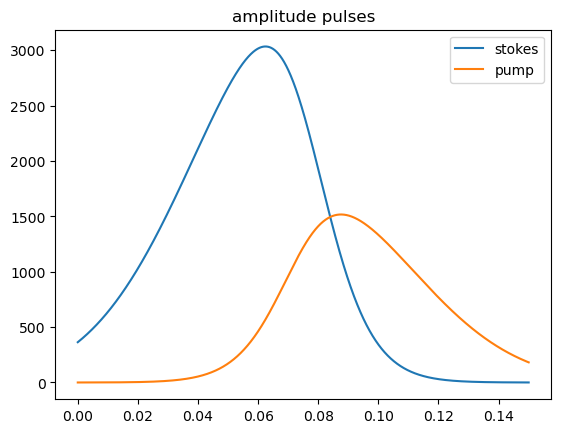

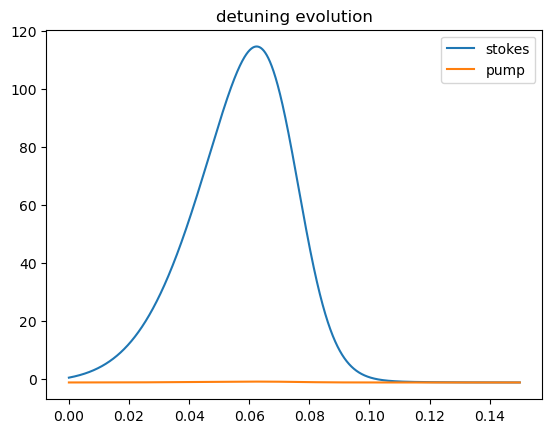

[ 14.53743295 996.33972198  -1.20631162]
0.9454800891012052


In [10]:
(best_score, best_info) = objective_function(best_para, full_info=True)
best_score = 1-best_score

pulse_param = best_para[0]
laser_amp = best_para[1]
const_det = best_para[2]

_length_repump = best_info["duration"]
detuning_magn = best_info["det_magn"]
_n = best_info["pulse_n"]
_c = best_info["pulse_c"]
stokes_pulse = best_info["stokes_pulse"]
pump_pulse = best_info["pump_pulse"]
stokes_det = best_info["stokes_detuning"]
pump_det = best_info["pump_detuning"]
rho_fin = best_info["rho_fin"]
t = best_info["time_array"]
_shape = best_info["pulse_shape"]

print(f"    'param_1': {pulse_param},\n    'laser_amplitude': {laser_amp},\n    'detuning': {const_det},\n    'duration': {_length_repump},\
      \n    'detuning_magn': {detuning_magn},\n    '_n': {_n},\n    '_c': {_c},\n    'pulse_shape': '{_shape}',\n    'rotation_number':")






#plot the pulses found to be optimal

T=_length_repump/9
a=1/np.sqrt(2)

    
plt.plot(t,stokes_pulse,label="stokes")
plt.plot(t,pump_pulse,label="pump")
plt.title("amplitude pulses")
plt.legend()
plt.show()


plt.plot(t,stokes_det+const_det, label="stokes")
plt.plot(t,pump_det+const_det,label="pump")
plt.title("detuning evolution")
plt.legend()
plt.show()

print(best_para)
print(best_score)


In [11]:
rho_init = params_dict["psi_init"]*params_dict["psi_init"].dag()
rho_des = params_dict["psi_des"]*params_dict["psi_des"].dag()

#rot 1
#x,y=0,5

#rot 3
x,y = 0,7

print(rho_des.full()[x][x], rho_des.full()[x][y], rho_des.full()[y][x], rho_des.full()[y][y])
print(rho_fin.full()[x][x], rho_fin.full()[x][y], rho_fin.full()[y][x], rho_des.full()[y][y])

#print(rho_des.full()[2][2], rho_des.full()[2][3], rho_des.full()[3][2], rho_des.full()[3][3])
#print(rho_fin.full()[2][2], rho_fin.full()[2][3], rho_fin.full()[3][2], rho_des.full()[3][3])



print(rho_init)
print(rho_des)
print(rho_fin)



0j 0j 0j 0j
(0.054339869705302205+0j) (-1.3922888156084784e-08-3.184480711162441e-10j) (-1.3922888156084784e-08+3.184480711162441e-10j) 0j
Quantum object: dims = [[16], [16]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.5  0.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.  -0.5  0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0. 

In [12]:
"""def results_plotter(results_index:int, _search_data):
    column = search_data.columns[results_index]
    plt.scatter(search_data[column],search_data["score"], marker="x", color="black")
    plt.xlabel(column)
    plt.ylabel("score")
    plt.show()"""

'def results_plotter(results_index:int, _search_data):\n    column = search_data.columns[results_index]\n    plt.scatter(search_data[column],search_data["score"], marker="x", color="black")\n    plt.xlabel(column)\n    plt.ylabel("score")\n    plt.show()'